In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import matplotlib
#Customize background and pallete colors 
sns.set_style("darkgrid")
#ncol = len(phy_norm.T.columns)
from matplotlib import cm
ncol=21
values = np.linspace(0,1, ncol)
#colors_ = cm.Paired(values)
colors_=cm.tab20(values)

# MEBS in time  

### Comand line of MEBS 

Example comand line of mebs in the metagenomic dataset containing 12  microbial mat metagenomes 



```bash
perl  mebs.pl -input mats_fasta/ -type metagenomic -fdr 0.0001 -comp > mats.fdr0.0001.tsv 
```


### MEBS output  

In [2]:
#%%bash
#less -S  ../data/mats.fdr0.0001.tsv | cut -f 1,2,3,4,5,6 > ../data/suplementary.fdr.scores.tab
#sed 's/__metahit.final.contigs.fa.prodigal.faa//g' ../data/mats.fdr0.0001.tsv   | sed 's/_metahit.final.contigs.fa.prodigal.faa//g'  | sed 's/\*//g'> mats.fasta.2plot.tab

### Convert to a pandas dataframe 

In [3]:
scores=pd.read_table("../data/mats.fasta.2plot.tab",index_col=0)
scores=scores[['sulfur', 'carbon', 'oxygen','nitrogen', 'iron']]
scores

,sulfur,carbon,oxygen,nitrogen,iron
C3,8.714,35.156,6.853,19.180,9.391
B3,8.535,42.132,6.839,19.226,9.391
C2,8.262,33.394,6.839,18.785,9.391
C1,9.085,29.336,6.839,19.048,9.391
A3,8.901,42.838,6.839,19.226,9.391
B2,8.989,35.881,6.839,19.226,9.391
C4,8.901,37.170,6.839,19.226,9.391
A1,8.505,36.301,6.839,19.031,9.391
A2,8.696,33.383,6.839,19.650,9.391
A4,8.763,40.041,6.554,18.946,9.391


### Generate a metadata file 
The sample names must be the same

In [4]:
ids=pd.read_table("../data/samples_id.tab",index_col=0)
ids.head()

,Time,Site
Sample,,
A1,Autumn 12,A
B1,Autumn 12,B
C1,Autumn 12,C
A2,Spring 13,A
B2,Spring 13,B


### Concatenate into a single file 

In [5]:
concat=pd.concat([ids, scores],axis=1)
concat.max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Time        Spring 14
Site                C
sulfur          9.085
carbon         42.838
oxygen          6.853
nitrogen        19.65
iron            9.391
dtype: object

### Plot scores


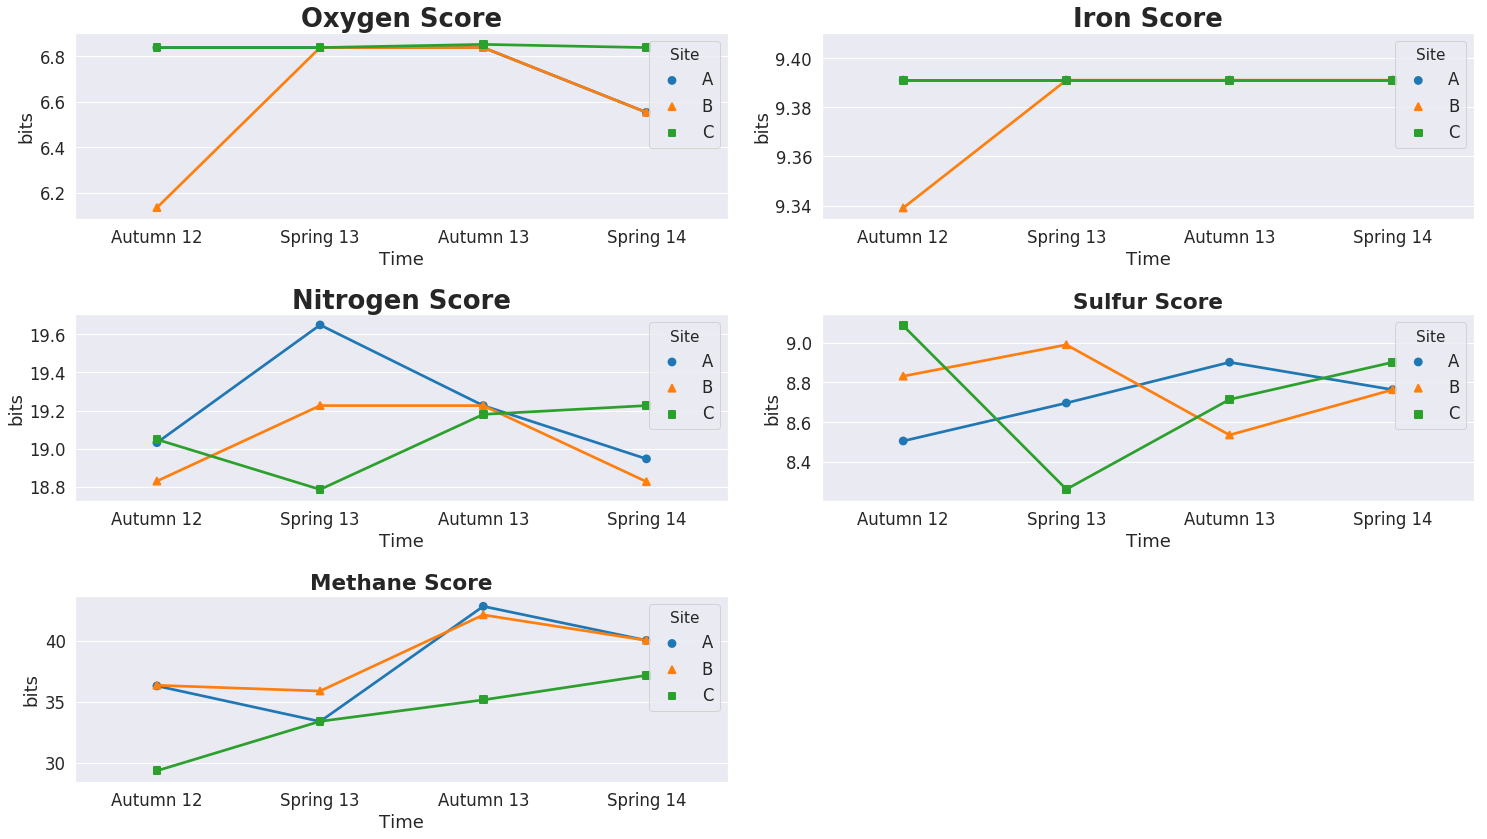

In [10]:
sns.set(font_scale=1.5)
X = 21
Y = 12

fig = plt.figure(figsize=(X, Y))


#############################################
plt.subplot(321)
ax=sns.pointplot(x="Time", y="oxygen", hue="Site", data=concat, 
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"],  palette="tab10", size=1)

#plt.title("A",loc='left',weight='bold',size='large')
plt.title("Oxygen Score",weight='bold',size='x-large')
plt.ylabel("bits")
plt.tight_layout()
#############################################
plt.subplot(322)
ax=sns.pointplot(x="Time", y="iron", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], palette="tab10")
#plt.title("B",loc='left',weight='bold',size='large')
plt.ylabel("bits")
plt.title("Iron Score",weight='bold',size='x-large')
plt.tight_layout()
#############################################
#linestyles=[":", ":",":"]
plt.subplot(323)
ax=sns.pointplot(x="Time", y="nitrogen", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], palette="tab10")
#plt.title("C",loc='left',weight='bold',size='large')
plt.title("Nitrogen Score",weight='bold',size='x-large')
plt.ylabel("bits")
plt.tight_layout()
#############################################
plt.subplot(324)
ax=sns.pointplot(x="Time", y="sulfur", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], palette="tab10")
#plt.title("D",loc='left',weight='bold',size='large')
plt.title("Sulfur Score",weight='bold',size='large')
plt.ylabel("bits")
plt.tight_layout()
#############################################
plt.subplot(325)
ax=sns.pointplot(x="Time", y="carbon", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], palette="tab10",scatter_kws={'s':20})
#plt.title("F",loc='left',weight='bold',size='large')
plt.title("Methane Score",weight='bold',size='large')
plt.ylabel("bits")
plt.tight_layout()

plt.savefig("../figures/Figure6_A.png",bbox_inches='tight',dpi=800)